# Import the dependencies

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model  import LinearRegression
from sklearn import metrics

# Data collection and processing


In [32]:
Data = pd.read_csv("/content/car data.csv")

In [33]:
Data.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [5]:
#getting info about the dataset
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [6]:
#checking number of missing values
Data.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

In [13]:
Data["Fuel_Type"].value_counts()

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64

In [14]:
Data["Selling_type"].value_counts()

Dealer        195
Individual    106
Name: Selling_type, dtype: int64

In [ ]:
Data["Transmission"].value_counts()

In [15]:
Data.replace({"Fuel_Type":{"Petrol":0,"Diesel":1,"CNG":2}},inplace = True)
Data.replace({"Selling_type":{"Dealer":0,"Individual":1}},inplace = True)
Data.replace({"Transmission":{"Automatic":0,"Manual":1}},inplace = True)


## Splitting Data into Train and Test

In [16]:
x= Data.drop(["Car_Name","Selling_Price"], axis =1)
y= Data["Selling_Price"]

In [17]:
x_train, x_test, y_train, y_test = train_test_split(x,
                                                    y,
                                                    test_size = 0.2,
                                                    random_state = 3)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(240, 7)
(240,)
(61, 7)
(61,)


## Linear Regression

In [19]:
#loading the linear regression model
linear_regression_model= LinearRegression()

In [20]:
linear_regression_model.fit(x_train, y_train)

LinearRegression()

## Model Evaluation

In [22]:
training_data_prediction = linear_regression_model.predict(x_train)

In [23]:
#R squared error
error_score = metrics.r2_score(y_train,training_data_prediction)
print("The R squared error is: ", error_score)

The R squared error is:  0.8847152957344534


## Visualize the real vs predicted

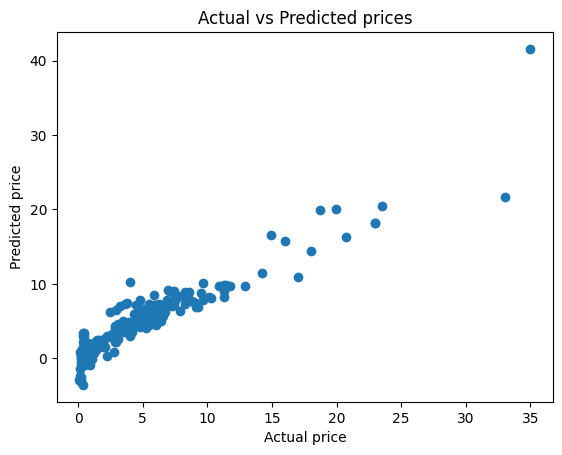

In [24]:
plt.scatter(y_train, training_data_prediction)
plt.xlabel("Actual price")
plt.ylabel("Predicted price")
plt.title("Actual vs Predicted prices")
plt.show()


In [26]:
test_data_prediction =linear_regression_model.predict(x_test)

In [27]:
error_score = metrics.r2_score(y_test,test_data_prediction)
print("The R squared error is: ", error_score)

The R squared error is:  0.8434675201311685


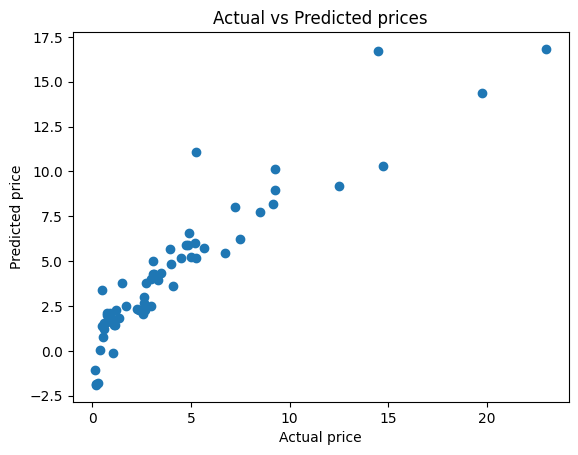

In [29]:
plt.scatter(y_test, test_data_prediction)
plt.xlabel("Actual price")
plt.ylabel("Predicted price")
plt.title("Actual vs Predicted prices")
plt.show()
